# Presenting a category

The "higher-dimensional rewrite systems" that we construct in `rewalt` are interpretable in higher-dimensional categories, but they are, in general, different from higher-dimensional categories, in that they have no notion of *composition* of diagrams; that is, there's no way, in general, to "turn a diagram with many n-cells into a single n-cell".

Nevertheless, `rewalt` contains an implementation of a model of higher categories, in the form of [diagrammatic sets with weak composites](https://arxiv.org/abs/2007.14505). This allows us to "declare" a cell to be the composite of a diagram; the composition is exhibited by a higher-dimensional *compositor* cell.

In this notebook, we will use the dedicated methods to construct a presentation of a simple finite category, consisting of a commuting square of four morphisms.

## Adding all objects and morphisms

We start by creating an empty `DiagSet`, and adding all the objects and morphisms of our category. We have four objects (0-generators).

In [1]:
import rewalt

C = rewalt.DiagSet()

x0 = C.add('x0')
x1 = C.add('x1')
x2 = C.add('x2')
x3 = C.add('x3')

Then we add the four morphisms (1-generators) that form the boundary of our commuting square.

In [2]:
f0 = C.add('f0', x0, x1)
f1 = C.add('f1', x1, x3)
g0 = C.add('g0', x0, x2)
g1 = C.add('g1', x2, x3)

Now we have two parallel diagrams of two 1-cells: `f0.paste(f1)` and `g0.paste(g1)`. We add the "diagonal" morphism that will be the composite of both diagrams.

In [3]:
h = C.add('h', x0, x3)

That's it; now we move on to the compositors.

## Adding compositors

We declare a generator to be the "weak composite" of a diagram with the `make_composite` method. This will add a "compositor" 2-cell, and return it as a `Diagram` object.

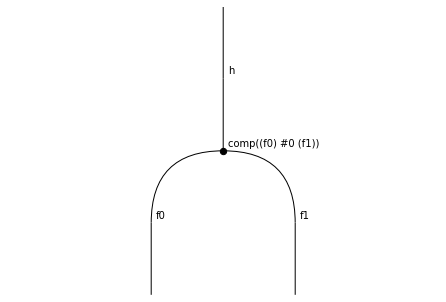

In [4]:
c_f = C.make_composite('h', f0.paste(f1))
c_f.draw()

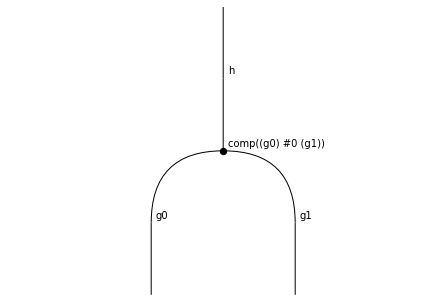

In [5]:
c_g = C.make_composite('h', g0.paste(g1))
c_g.draw()

We can check that a diagram has a composite with the `hascomposite` attribute; if a diagram has a composite, we can retrieve it with the `composite` attribute.

In [6]:
f0.paste(f1).hascomposite

True

In [7]:
f0.paste(f1).composite == h

True

A compositor allows us to rewrite a diagram into a cell. Now, according to the theory, to exhibit a genuine weak composite, the compositor would need to be *weakly invertible*.

As we saw in [another notebook](monoids.html), since weak invertibility requires an infinite "tower" of cells, the approach of `rewalt` is to "invert only when needed". 
That also applies to compositors, which are created in "one direction only", and must be explicitly inverted if needed.

(Another reason to not invert by default is that one may want to use `DiagSet` objects to implement different kinds of higher structures, such as [representable multicategories](https://www.sciencedirect.com/science/article/pii/S0001870899918777) or "lax" versions thereof, where it is important that compositors only go "one way".)

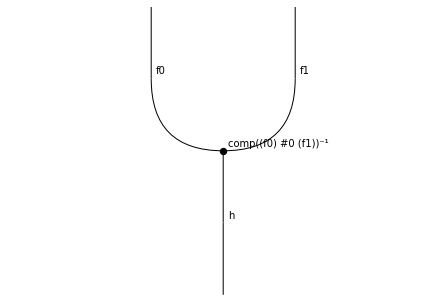

In [8]:
c_f_inv, c_f_rinvertor, c_f_linvertor = C.invert(c_f)
c_f_inv.draw()

Now that we have an inverse compositor, we can "rewrite" `g0.paste(g1)` into `f0.paste(f1)` via their shared composite.

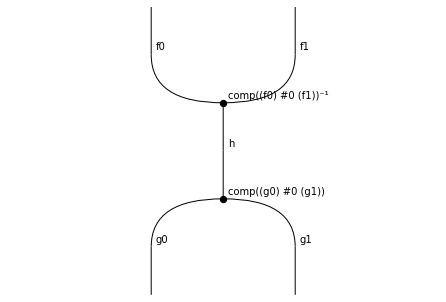

In [9]:
g_to_f = c_g.paste(c_f_inv)
g_to_f.draw()

To go the other way around, we need to invert the compositor for `g0.paste(g1)`.

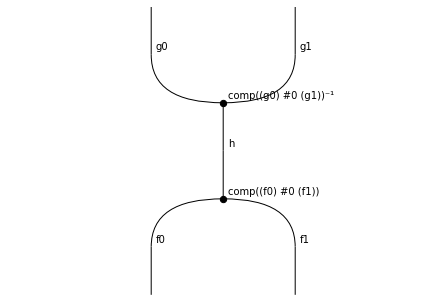

In [10]:
c_g_inv, c_g_rinvertor, c_g_linvertor = C.invert(c_g)

f_to_g = c_f.paste(c_g_inv)
f_to_g.draw()

This pair of diagrams "embodies" the commuting square with sides `f0`, `f1`, `g0`, `g1`.

We can use the "invertors" to show that the two diagrams are each other's weak inverse.

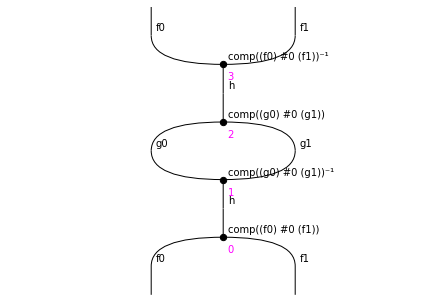

In [11]:
f_to_g.paste(g_to_f).draw(nodepositions=True)

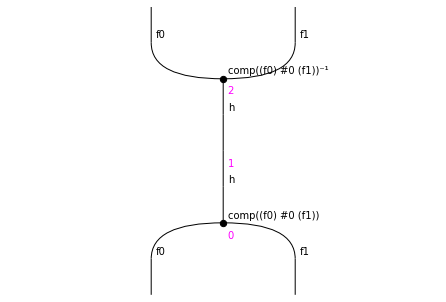

In [12]:
rew1 = f_to_g.paste(g_to_f).rewrite([1, 2], c_g_linvertor)
rew1.output.draw(nodepositions=True)

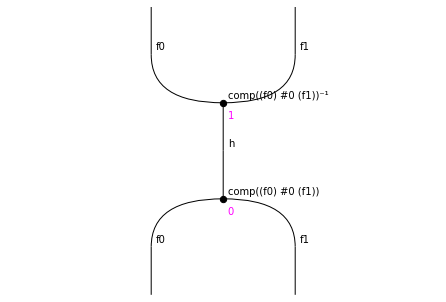

In [13]:
rew2 = rew1.output.rewrite([0, 1], c_f.runitor('-'))
rew2.output.draw(nodepositions=True)

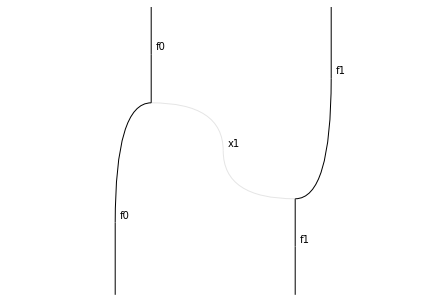

In [14]:
rew3 = rew2.output.rewrite([0, 1], c_f_rinvertor)
rew3.output.draw()

## Composites involving units

Now in `C` all 1-dimensional diagrams have composites, so we can see `C` as a category. 

Except, in fact, not all 1-dimensional diagrams have composites that `C` *knows of*!

In [15]:
x0.unit().paste(f0).hascomposite

False

Nevertheless, we can certainly turn this diagram into a single cell, using the left unitor for `f0`.

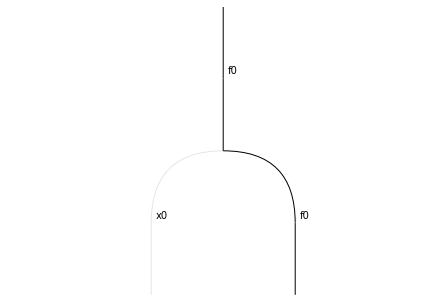

In [16]:
f0.lunitor('-').draw()

This is even already "weakly invertible", as all degenerate cells are.

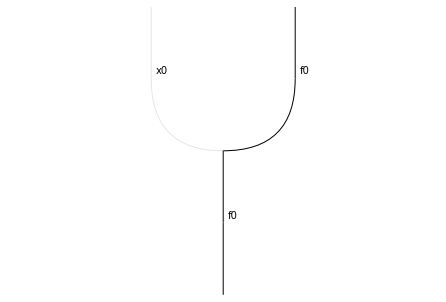

In [17]:
f0.lunitor('-').inverse.draw()

So why does `rewalt` not consider unitors to be compositors? 

There is a good reason: `rewalt` does *not* make a distinction between presentations of categories, bicategories, or n-categories for any other n. 
And there are certainly non-strict bicategories in which the composite of a 1-cell with a unit is *not* equal to the 1-cell.

So if we want `C` to know that `f0` is, indeed, the composite of `x0.unit()` and `f0`, we need to make it explicit.

In [18]:
c_x0_f0 = C.make_composite('f0', x0.unit().paste(f0))

This will add a compositor which is *not* the same as the left unitor on `f0`.

(The reason you cannot declare an existing degenerate cell to be a compositor is that `rewalt` wants compositors to be generators, so it can remember which compositors a `DiagSet` contains just by their list of names).

So if we want to "equate" the compositor to the unitor, we have to do it "weakly", by adding a 3-cell between them.

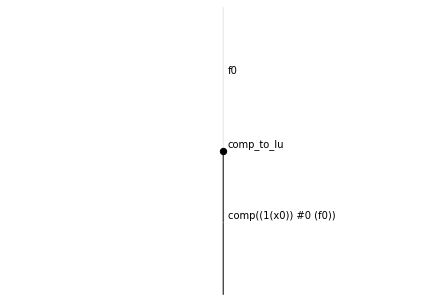

In [19]:
comp_to_lu = C.add('comp_to_lu', c_x0_f0, f0.lunitor('-'))
comp_to_lu.draw()